In [110]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-dataset


In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [112]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check For the Balance in the Binary Class (Did not perform much EDA)

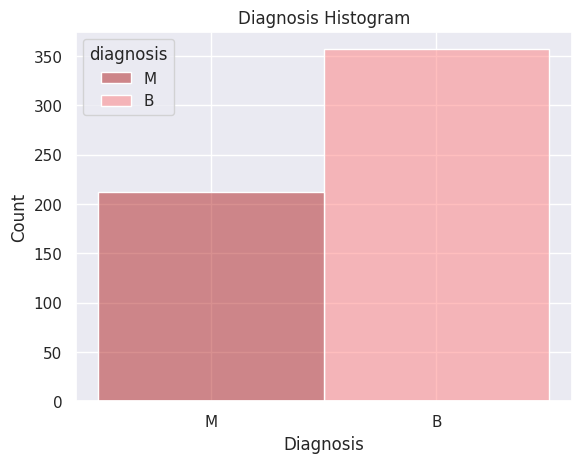

In [115]:
sns.histplot(data=df,x='diagnosis',hue='diagnosis',palette=['#B22222', '#FF7F7F'])
plt.title('Diagnosis Histogram')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [116]:
df.drop('id',axis=1,inplace=True)

In [117]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [118]:
df['diagnosis']=(df['diagnosis']=='M').astype(int)

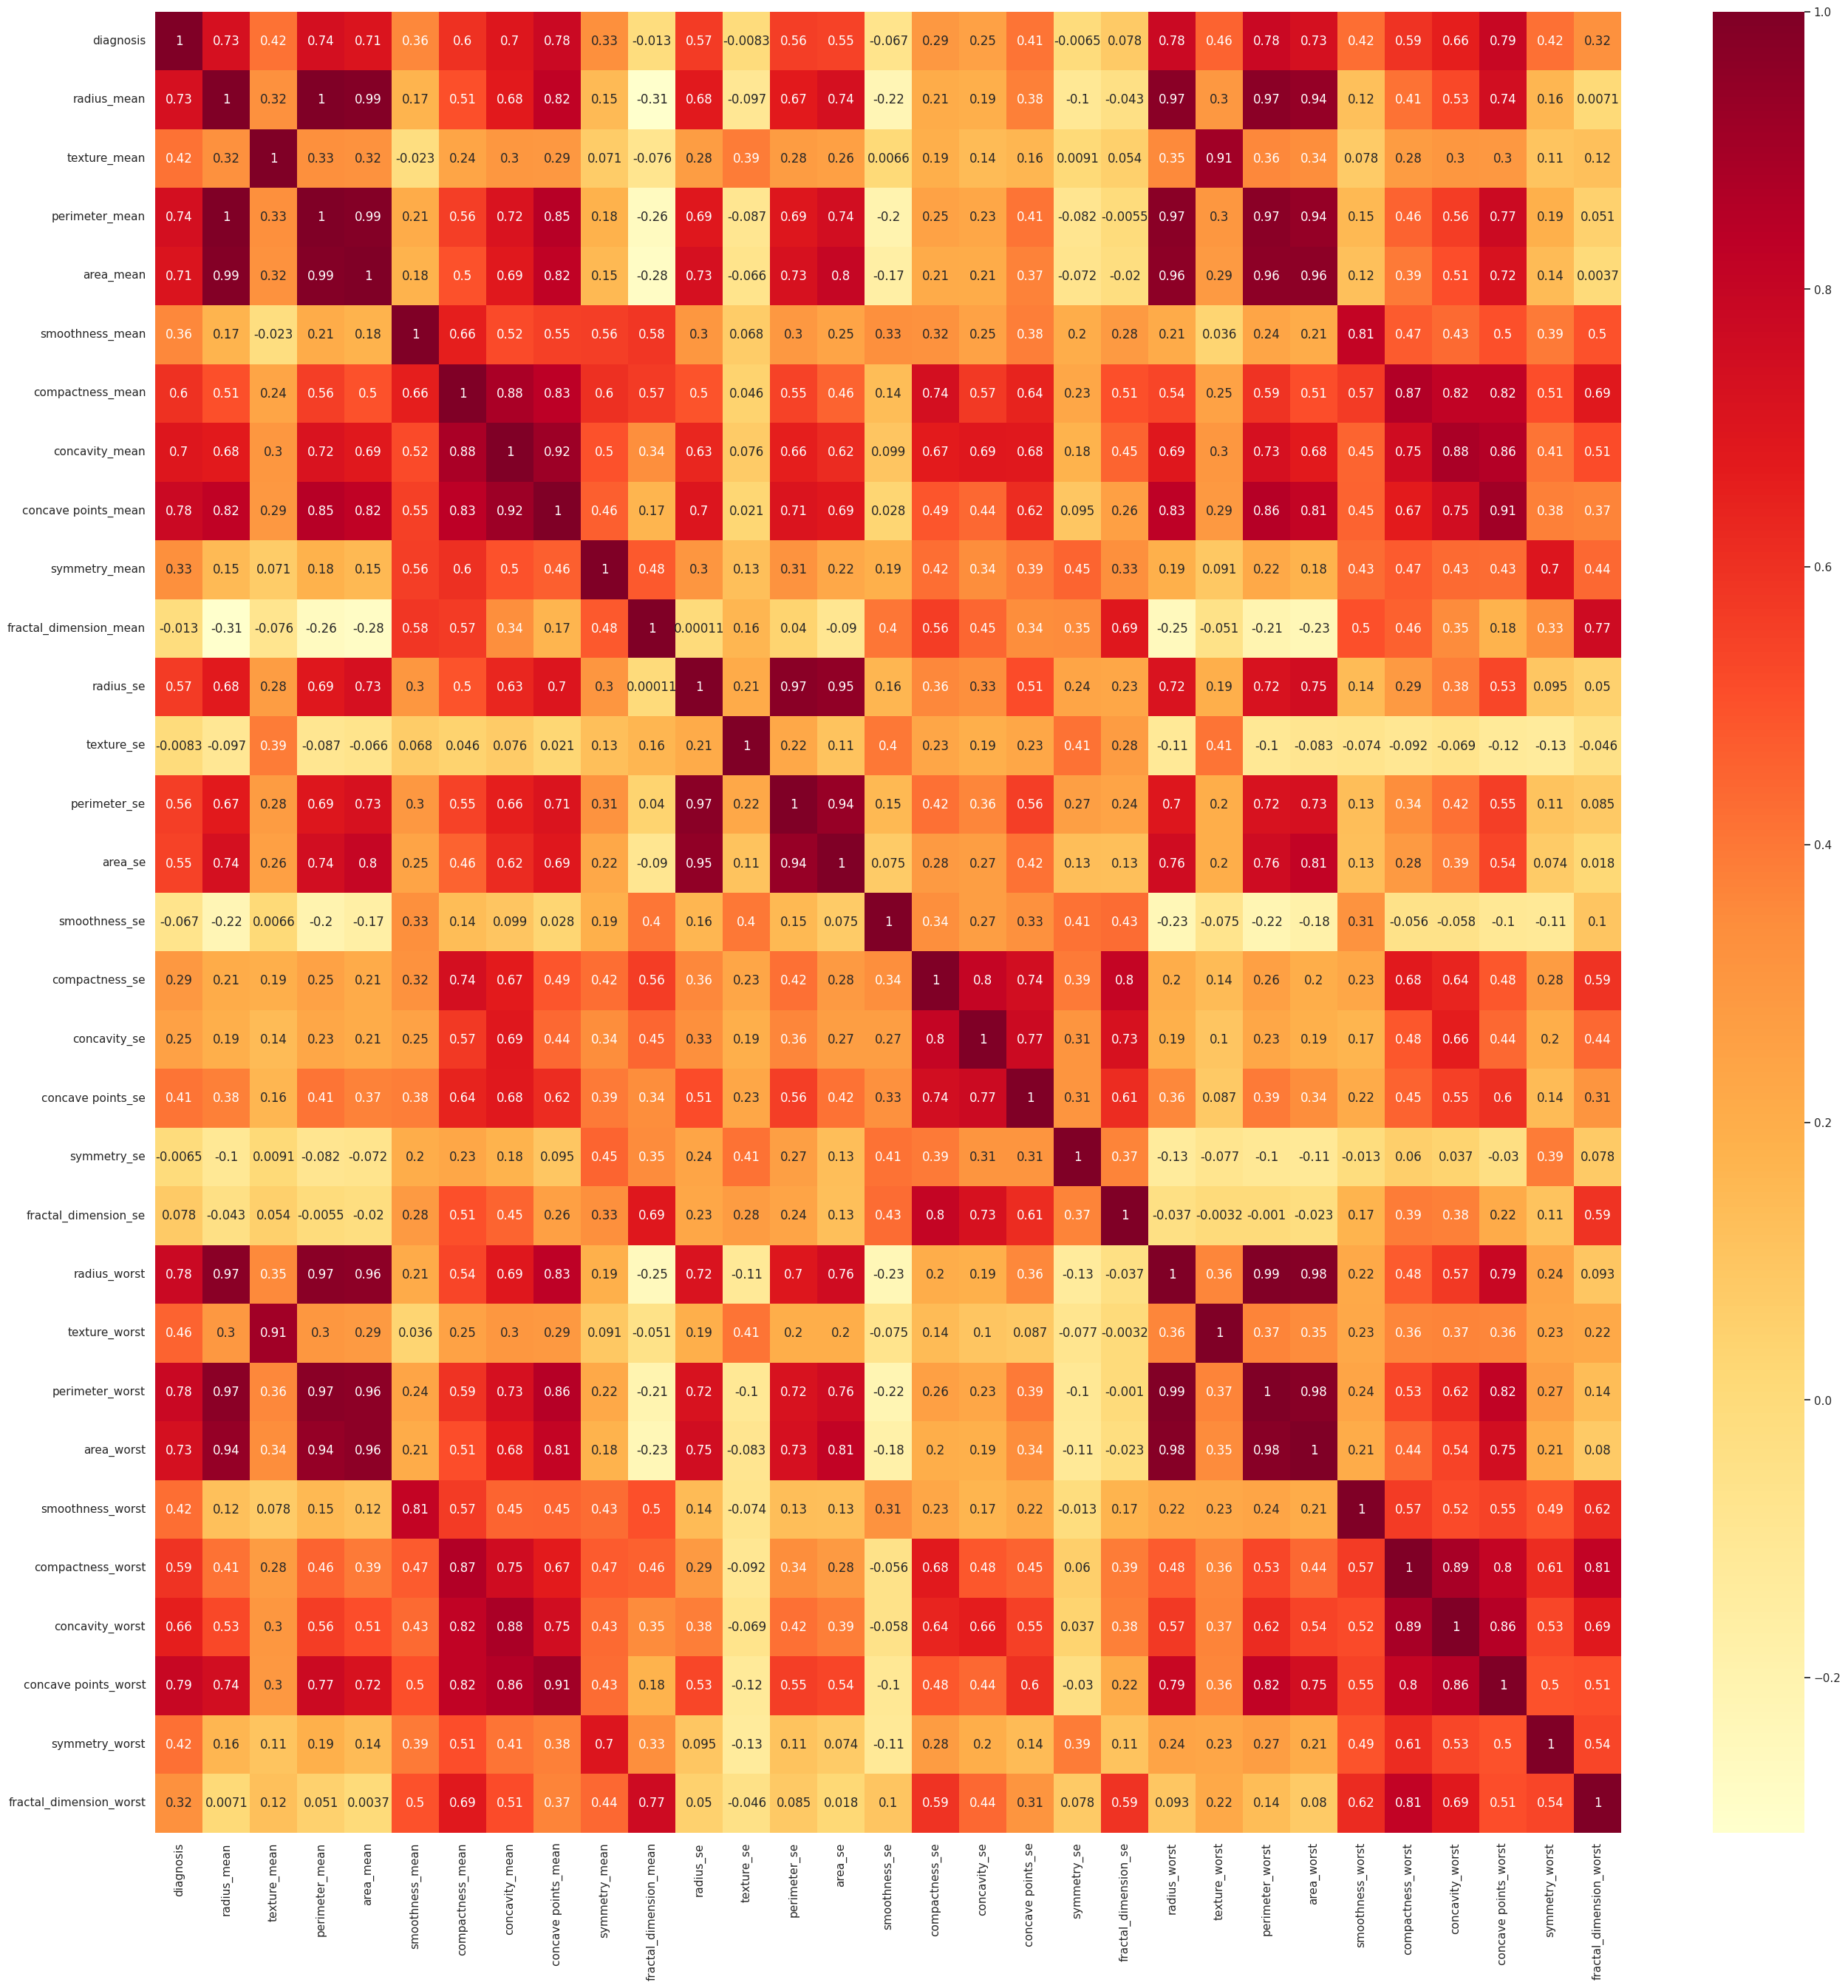

In [119]:
corr=df.corr()
plt.figure(figsize=(32,32))
sns.heatmap(corr,cmap='YlOrRd',annot=True)
plt.show()

Taking up only the features with corr value greater than 0.2 and reducing the feature map

In [120]:
corr_val=abs(corr['diagnosis'])
feat_new=corr_val[corr_val>0.2]
feat_name=[i for i in feat_new.index if i!='diagnosis']
print(feat_name)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [121]:
x=df[feat_name].values
y=df['diagnosis'].values

In [122]:
def scale(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x=(x-mean)/std
    return x

In [123]:
from sklearn.model_selection import train_test_split

x=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

Neural Network code

In [124]:
def relu(z):
    a=np.maximum(0,z)
    return a,z

def relu_back(da,z):
    dz=np.array(da,copy=True)
    dz[z<=0]=0
    return dz

In [125]:
def sigmoid(z):
    a=1/(1+np.exp(-z))
    return a,z

def sigmoid_back(da,z):
    s=1/(1+np.exp(-z))
    dz=da*s*(1-s)
    return dz

In [126]:
class NeuralNetwork:
    def __init__(self,layer_dims,learning_rate):
        self.layer_dims=layer_dims
        self.learning_rate=learning_rate
        self.parameters={}
        self.n_layers=len(layer_dims)

    def initialize_parameters(self):
        np.random.seed(3)
        for l in range(1,self.n_layers):
            self.parameters[f"w{l}"]=np.random.randn(self.layer_dims[l],self.layer_dims[l-1])*0.01
            self.parameters[f"b{l}"]=np.zeros((self.layer_dims[l],1))

    def linear_forward(self,a,w,b):
        z=np.dot(w,a)+b
        return z,(a,w,b)

    def forward_layer(self,a_prev,w,b,activation):
        z,linear_cache=self.linear_forward(a_prev,w,b)
        if activation=='sigmoid':
            a,activation_cache=sigmoid(z)
        else:
            a,activation_cache=relu(z)

        return a,(linear_cache,activation_cache)

    def forward_propagation(self,x):
        a=x
        caches=[]
        for l in range(1,self.n_layers-1):
            a,cache=self.forward_layer(a,self.parameters[f"w{l}"],self.parameters[f"b{l}"],"relu")
            caches.append(cache)
        al,cache=self.forward_layer(a,self.parameters[f"w{self.n_layers-1}"],self.parameters[f"b{self.n_layers-1}"],"sigmoid")
        caches.append(cache)
        return al,caches

    def compute_cost(self,al,y):
        m=y.shape[1]
        cost=(-1/m)*np.sum(y*np.log(al+1e-9)+(1-y)*np.log(1-al+1e-9))
        return np.squeeze(cost)

    def linear_backward(self,dz,cache):
        a_prev,w,_=cache
        m=a_prev.shape[1]
        dw=(1/m)*np.dot(dz,a_prev.T)
        db=(1/m)*np.sum(dz,axis=1,keepdims=True)
        da_prev=np.dot(w.T,dz)
        return da_prev,dw,db

    def backward_layer(self,da,cache,activation):
        linear_cache,activation_cache=cache
        if activation=='relu':
            dz=relu_back(da,activation_cache)
        else:
            dz=sigmoid_back(da,activation_cache)
        return self.linear_backward(dz,linear_cache)

    def back_propagation(self,al,y,caches):
        grads={}
        l=self.n_layers-1
        y=y.reshape(al.shape)
        dal=-(np.divide(y,al+1e-9)-np.divide(1-y,1-al+1e-9))
        grads[f"da{l-1}"],grads[f"dw{l}"],grads[f"db{l}"]=self.backward_layer(dal,caches[l-1],'sigmoid')

        for l in reversed(range(l-1)):
            grads[f"da{l}"],grads[f"dw{l+1}"],grads[f"db{l+1}"]=self.backward_layer(grads[f"da{l+1}"],caches[l],"relu")

        return grads

    def update_parameters(self,grads):
        for l in range(1,self.n_layers):
            self.parameters[f"w{l}"]-=self.learning_rate*grads[f"dw{l}"]
            self.parameters[f"b{l}"]-=self.learning_rate*grads[f"db{l}"]

    def fit(self,x,y,epochs=2500,print_cost=True):
        x,y=x.T,y.reshape(1,-1)
        self.initialize_parameters()
        costs=[]

        for i in range(epochs):
            al,caches=self.forward_propagation(x)
            cost=self.compute_cost(al,y)
            grads=self.back_propagation(al,y,caches)
            self.update_parameters(grads)
            if print_cost and i%500==0:
                print(f"Cost after iteration {i}: {cost:6f}")
                costs.append((i,cost))

            if print_cost:
                epochs_list, cost_values = zip(*costs)
                plt.figure(figsize=(10, 6))
                sns.set(style="darkgrid")
                sns.lineplot(x=epochs_list, y=cost_values, color="#00F1FF", linewidth=2.5)
                plt.title("Training Cost Over Epochs", fontsize=16, color="#00F1FF", pad=15)
                plt.xlabel("Epoch", fontsize=12, color="#00F1FF")
                plt.ylabel("Cost", fontsize=12, color="#00F1FF")
                plt.xticks(color='#00F1FF')
                plt.yticks(color='#00F1FF')
                plt.gca().set_facecolor("#111111")
                plt.gcf().patch.set_facecolor("#111111")
                plt.tight_layout()
                plt.show()
    def predict(self,x,y):
        x=x.T
        al,_=self.forward_propagation(x)
        predictions=(al>0.5).astype(int)
        acc=np.mean(predictions.flatten()==y)*100
        print(f"Accuracy: {acc:2f}%")
        return predictions.flatten(),acc

In [127]:
def train_evaluation_model(x_train,y_train,x_test,y_test,learning_rate,layer_dimensions,epochs):
    model=NeuralNetwork(learning_rate=learning_rate,layer_dims=layer_dimensions)
    model.fit(x_train,y_train,epochs=epochs,print_cost=False)
    predictions,accuracy=model.predict(x_test,y_test)
    # return accuracy

In [128]:
learning_rate=0.001
layers=[25,64,32,16,1]
epochs=2500
train_evaluation_model(x_train,y_train,x_test,y_test,learning_rate=learning_rate,layer_dimensions=layers,epochs=epochs)

Accuracy: 62.280702%


In [129]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

model=models.Sequential()
model.add(layers.Input(shape=(25,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=2500,verbose=0,batch_size=32)
loss,acc=model.evaluate(x_test,y_test,verbose=0)
print(f"Accuracy: {acc*100}")

Accuracy: 96.49122953414917


| Feature              | My From Scratch Model         | TensorFlow Model         |
| -------------------- | -------------------------- | ------------------------ |
| Weight Init          | `randn * 0.01`             | Glorot Uniform           |
| Optimizer            | Basic Gradient Descent     | Adam                     |
| Activation Stability | Manual                     | Highly Stable            |
| Loss Function        | Manual Binary Crossentropy | Optimized                |
| Batch Training       | No                         | Yes (batch\_size=32)     |
| Speed & Precision    | NumPy loops                | Highly optimized backend |
| Result               | \~62% Accuracy             | \~96% Accuracy           |
